### Libraries 

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

### Data Loader

In [2]:

# Hyperparameters
image_size = 224  # Resize images to 64x64
batch_size = 32
learning_rate = 0.001
num_epochs = 10
num_classes = 2  # Binary classification

# Data transforms
transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Load dataset using ImageFolder
train_dir =r"C:\Users\moawi\Downloads\Nascon day 3 win\anime-style-transfer\train"
test_dir = r"C:\Users\moawi\Downloads\Nascon day 3 win\anime-style-transfer\test"

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Model Class

In [3]:



# Define custom ANN
class SimpleANN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleANN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


### Training Loop

In [4]:

# Calculate input size (channels * height * width)
sample_input, _ = next(iter(train_loader))
input_size = sample_input[0].numel()

# Model, Loss, Optimizer
model = SimpleANN(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 1.7238
Epoch [2/10], Loss: 0.3539
Epoch [3/10], Loss: 0.1568
Epoch [4/10], Loss: 0.1181
Epoch [5/10], Loss: 0.0808
Epoch [6/10], Loss: 0.0288
Epoch [7/10], Loss: 0.0703
Epoch [8/10], Loss: 0.0488
Epoch [9/10], Loss: 0.0028
Epoch [10/10], Loss: 0.0008


### Model Testing

In [5]:


# Testing loop
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.31%


### function for sample inference

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

def predict_single_image(image_path, model, transform, class_names):
    # Load and preprocess image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    # Inference
    model.eval()
    with torch.no_grad():
        output = model(image_tensor)
        _, predicted = torch.max(output, 1)
        predicted_class = class_names[predicted.item()]
        # predicted_class = predicted.item()
    # Plot the image with the predicted label
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}", fontsize=14)
    plt.axis('off')
    plt.show()

    return predicted_class


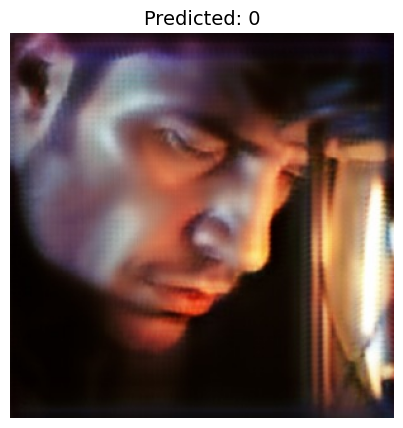

0

In [17]:
class_names=['animated','real']
image_path = r"C:\Users\moawi\Downloads\generatedSample01.jpg"
predict_single_image(image_path, model, transform, class_names)

